# PCA Digits

This is my second notebook about PCA. In this case, I will be working with a bit more sophisticated dataset, containing 64 dimensions and 1700 rows ish.

The followed structure will be similar to the irish notebook;

1. Load and explore dataset.
2. Visualizing the data to be able to understand deeply what we need.
3. Center data and consider if we need to scale data
4. Repeat semi-manual PCA with numpy
5. Visualize results
6. Compare with sklearn

In [1]:
from sklearn.datasets import load_digits
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
data = load_digits()
X = data.data
y = data.target
feature_names = data.feature_names
df = pd.DataFrame(X, columns=feature_names)
df['target'] = y

# Display the first few rows of the DataFrame
print(df.head())

   pixel_0_0  pixel_0_1  pixel_0_2  pixel_0_3  pixel_0_4  pixel_0_5  \
0        0.0        0.0        5.0       13.0        9.0        1.0   
1        0.0        0.0        0.0       12.0       13.0        5.0   
2        0.0        0.0        0.0        4.0       15.0       12.0   
3        0.0        0.0        7.0       15.0       13.0        1.0   
4        0.0        0.0        0.0        1.0       11.0        0.0   

   pixel_0_6  pixel_0_7  pixel_1_0  pixel_1_1  ...  pixel_6_7  pixel_7_0  \
0        0.0        0.0        0.0        0.0  ...        0.0        0.0   
1        0.0        0.0        0.0        0.0  ...        0.0        0.0   
2        0.0        0.0        0.0        0.0  ...        0.0        0.0   
3        0.0        0.0        0.0        8.0  ...        0.0        0.0   
4        0.0        0.0        0.0        0.0  ...        0.0        0.0   

   pixel_7_1  pixel_7_2  pixel_7_3  pixel_7_4  pixel_7_5  pixel_7_6  \
0        0.0        6.0       13.0       10.0

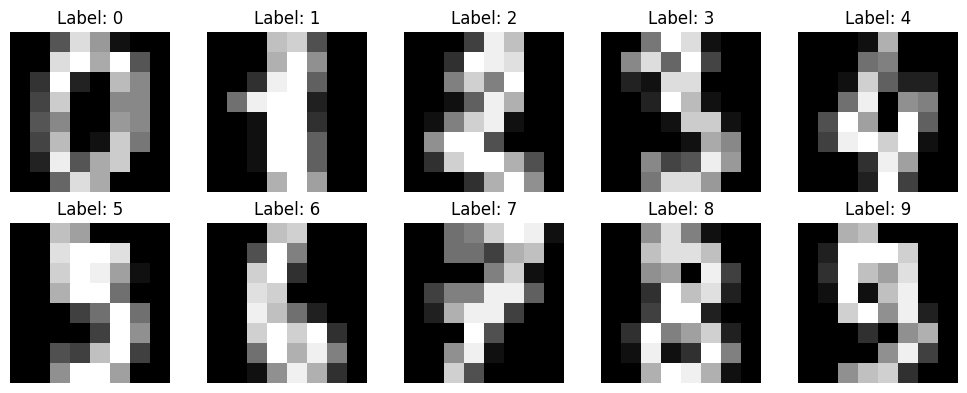

In [3]:
# Plotting the first 10 images in the dataset
plt.figure(figsize=(10, 4))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X[i].reshape(8, 8), cmap='gray')
    plt.title(f"Label: {y[i]}")
    plt.axis('off')

plt.tight_layout()
plt.show()

# Center data

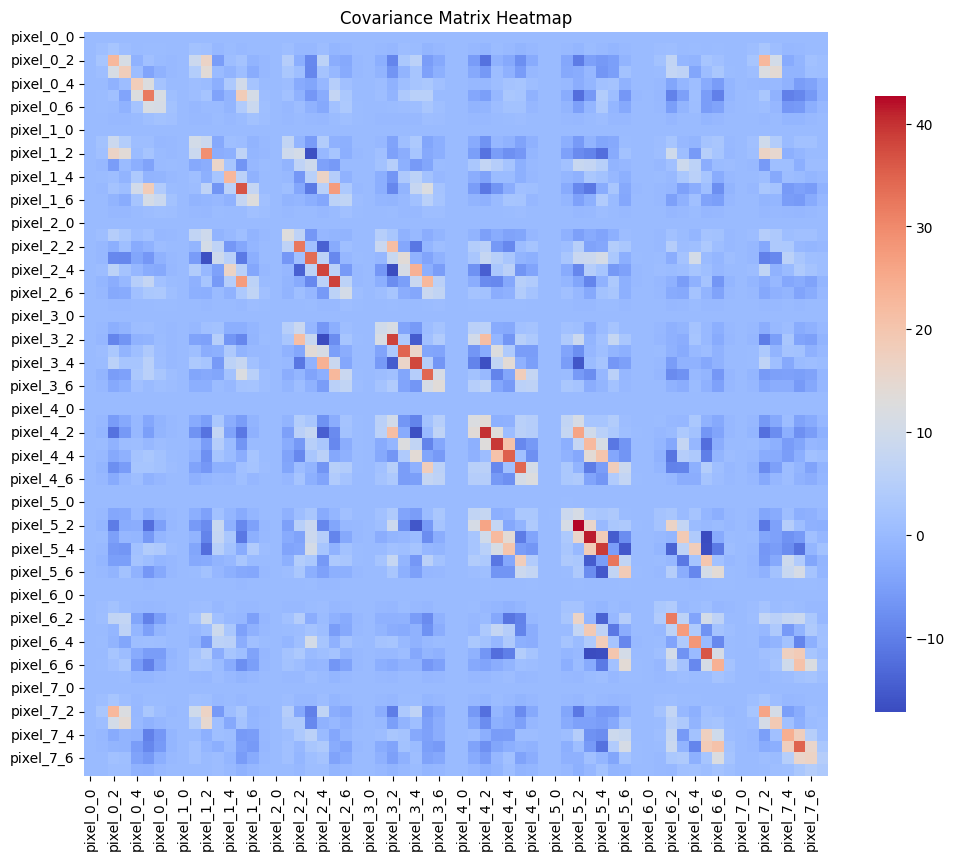

In [5]:
# Calculate and substract each column mean
X_centered = df.iloc[:, :-1].subtract(df.iloc[:, :-1].mean(axis=0), axis=1)

# Calculate the covariance matrix
cov_matrix = np.cov(X_centered.T)\

# Convert the covariance matrix to a DataFrame for better readability
cov_matrix = pd.DataFrame(cov_matrix, index=feature_names, columns=feature_names)           

# Plot the covariance matrix using a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(cov_matrix, annot=False, cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title('Covariance Matrix Heatmap')  
plt.show()

